<a href="https://colab.research.google.com/github/ibonetc/IA_EIA/blob/master/IA_PesarClases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('/content/acceptor_arabidopsis_315_binary.txt',sep='\t')

In [ ]:
data

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,...,a166,a167,a168,a169,a170,a171,a172,a173,a174,a175,a176,a177,a178,a179,a180,a181,a182,a183,a184,a185,a186,a187,a188,a189,a190,a191,a192,a193,a194,a195,a196,a197,a198,a199,a200,a201,a202,a203,a204,Clase
0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,1,1,1,0,1,0,...,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,1,1,1,0,1,1,1,0,1
1,1,0,1,0,1,0,0,1,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,...,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1
2,1,0,0,1,0,1,0,1,1,1,0,1,1,0,0,1,0,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,1,0,1
3,1,1,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,1,1,1,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,...,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,1,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0
311,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,1,1,0,1,1,0
312,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,0,1,1,...,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,1,1,0,1,1,0,0,1,0,0
313,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,1,0


In [ ]:
labels=data['Clase']
features = data.iloc[:,:-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42,stratify=labels)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([216,  36]))

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([54,  9]))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Masking
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report

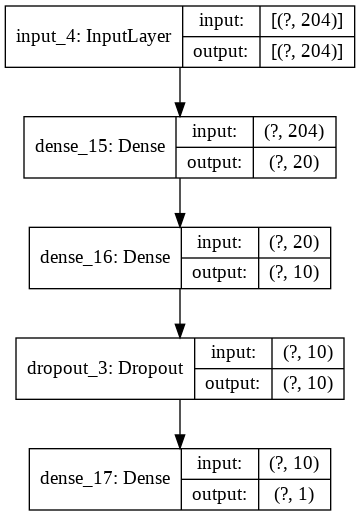

In [ ]:
input=Input(shape=(X_train.shape[1],))
x = Dense(20, activation="relu")(input)
x = Dense(10, activation="relu")(x)

x = Dropout(0.2)(x)
outputs = Dense(1, activation="sigmoid")(x)
model= Model(input, outputs)

plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    optimizer=optimizers.Adam(lr=1e-3),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [ ]:
history=model.fit(X_train,y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
8/8 [==============================] - 0s 27ms/step - loss: 0.4575 - accuracy: 0.8492 - val_loss: 0.4327 - val_accuracy: 0.8571
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3988 - accuracy: 0.8571 - val_loss: 0.4143 - val_accuracy: 0.8571
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3694 - accuracy: 0.8571 - val_loss: 0.4065 - val_accuracy: 0.8571
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3711 - accuracy: 0.8571 - val_loss: 0.3999 - val_accuracy: 0.8571
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3494 - accuracy: 0.8571 - val_loss: 0.3974 - val_accuracy: 0.8571
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3160 - accuracy: 0.8611 - val_loss: 0.3924 - val_accuracy: 0.8571
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3237 - accuracy: 0.8571 - val_loss: 0.3877 - val_accuracy: 0.8571
Epoch 8/100
8/8 [=========

In [ ]:
y_p = model.predict(X_test)
y_pred = [0 if p<0.5 else 1 for p in y_p]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        54
           1       0.50      0.11      0.18         9

    accuracy                           0.86        63
   macro avg       0.68      0.55      0.55        63
weighted avg       0.82      0.86      0.82        63



In [ ]:
neg, pos = np.bincount(data['Clase'])
total = neg + pos
print(neg, pos, total)

270 45 315


In [ ]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.58
Weight for class 1: 3.50


In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

In [ ]:
model= Model(input, outputs)
model.compile(
    optimizer=optimizers.Adam(lr=1e-3),
    loss="binary_crossentropy",
    metrics=METRICS
)

In [ ]:
history=model.fit(X_train,y_train, epochs=500, validation_data=(X_test,y_test),class_weight=class_weight)

Epoch 1/500
8/8 [==============================] - 1s 109ms/step - loss: 0.0263 - tp: 36.0000 - fp: 1.0000 - tn: 215.0000 - fn: 0.0000e+00 - accuracy: 0.9960 - precision: 0.9730 - recall: 1.0000 - auc: 0.9997 - val_loss: 0.8701 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 52.0000 - val_fn: 8.0000 - val_accuracy: 0.8413 - val_precision: 0.3333 - val_recall: 0.1111 - val_auc: 0.7335
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 0.0087 - tp: 36.0000 - fp: 0.0000e+00 - tn: 216.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.8489 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 52.0000 - val_fn: 8.0000 - val_accuracy: 0.8413 - val_precision: 0.3333 - val_recall: 0.1111 - val_auc: 0.7356
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 0.0343 - tp: 36.0000 - fp: 1.0000 - tn: 215.0000 - fn: 0.0000e+00 - accuracy: 0.9960 - precision: 0.9730 - recall: 1.0000 - auc: 0.9996 - val_loss: 0.8057 - val_

In [ ]:
y_p = model.predict(X_test)
y_pred = [0 if p<0.5 else 1 for p in y_p]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.60      0.33      0.43         9

    accuracy                           0.87        63
   macro avg       0.75      0.65      0.68        63
weighted avg       0.85      0.87      0.86        63



In [ ]:
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics =  ['auc', 'precision', 'recall']
  plt.figure(figsize=(10,10))
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])
    plt.legend()

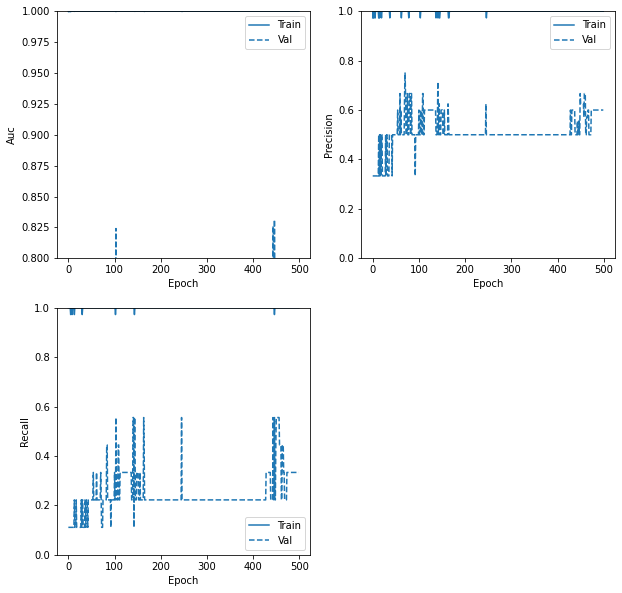

In [ ]:
plot_metrics(history)

In [ ]:
bool_train_labels = y_train != 0

In [ ]:
pos_features = X_train[bool_train_labels]
neg_features = X_train[~bool_train_labels]

pos_labels = y_train[bool_train_labels]
neg_labels = y_train[~bool_train_labels]

In [ ]:
neg_labels

127    0
180    0
78     0
192    0
148    0
      ..
244    0
114    0
69     0
266    0
67     0
Name: Clase, Length: 216, dtype: int64

In [ ]:
pos_features.shape

(36, 204)

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))
res_pos_features = pos_features.iloc[choices,:]
res_pos_features.shape

(216, 204)

In [ ]:
len(res_pos_features)

216

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([np.full(len(res_pos_features),1), np.full(len(neg_features),0)], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(432, 204)

In [ ]:
BUFFER_SIZE = 100000
BATCH_SIZE = 2048

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)

In [ ]:
val_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

In [ ]:
model= Model(input, outputs)
model.compile(optimizer=optimizers.Adam(lr=1e-3),loss="binary_crossentropy",metrics=METRICS)
resampled_history = model.fit(
    resampled_ds,
    epochs=200,
    steps_per_epoch=resampled_steps_per_epoch,
    validation_data=val_ds)

Epoch 1/200
1/1 [==============================] - 1s 749ms/step - loss: 0.0028 - tp: 1027.0000 - fp: 2.0000 - tn: 1076.0000 - fn: 6.0000 - accuracy: 0.9962 - precision: 0.9981 - recall: 0.9942 - auc: 0.9966 - val_loss: 1.6122 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 52.0000 - val_fn: 6.0000 - val_accuracy: 0.8730 - val_precision: 0.6000 - val_recall: 0.3333 - val_auc: 0.6944
Epoch 2/200
1/1 [==============================] - 0s 16ms/step - loss: 0.0038 - tp: 1004.0000 - fp: 0.0000e+00 - tn: 1044.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.7924 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 52.0000 - val_fn: 7.0000 - val_accuracy: 0.8571 - val_precision: 0.5000 - val_recall: 0.2222 - val_auc: 0.6996
Epoch 3/200
1/1 [==============================] - 0s 16ms/step - loss: 0.0041 - tp: 1030.0000 - fp: 0.0000e+00 - tn: 1018.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.

In [ ]:
y_p = model.predict(X_test)
y_pred = [0 if p<0.5 else 1 for p in y_p]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        54
           1       0.50      0.22      0.31         9

    accuracy                           0.86        63
   macro avg       0.69      0.59      0.61        63
weighted avg       0.83      0.86      0.83        63



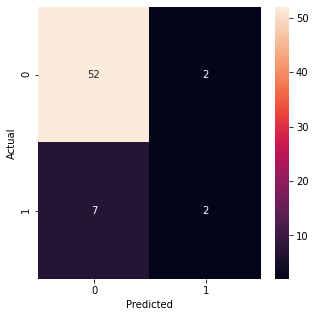

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  return cm
cm=plot_cm(y_test,y_p)